In [102]:
import subprocess
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [116]:
# domain = list(range(0, 1000))
# print(domain)
file_name = "population_sizing_results_L_20"
data = np.load("data/" + file_name + ".npy")
labels = ["With elitism", "Without elitism"]


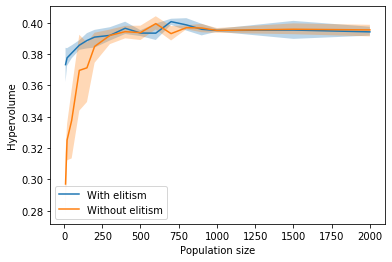

In [117]:
for i in range(len(data)):
	results = [np.array(x) for x in np.array(data[i][1])[:,1]]
	average = np.average(results, axis=1)

	interdecile_range_low = np.percentile(results, 10, axis=1)
	interdecile_range_high = np.percentile(results, 90, axis=1)


	domain = np.array(data[i][1])[:,0]

	plt.plot(domain, average)

	plt.fill_between(np.array(domain, dtype=float),
		interdecile_range_low,
		interdecile_range_high,
		alpha=0.3)

plt.xlabel('Population size')
plt.ylabel('Hypervolume')
plt.legend(labels) # [("l = " + x) for x in L]
fig = plt.gcf()
plt.show()

In [118]:
fig.savefig('plots/' + file_name)